In [9]:
from azure.quantum import Workspace
workspace = Workspace (
    subscription_id = "b0c3bbe3-7123-4ba4-9aa2-57d9845f4a1d",
    resource_group = "azurequantum",
    name = "qchack-2022-b",
    location = "eastus"
)


In [10]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b0c3bbe3-7123-4ba4-9aa2-57d9845f4a1d/resourceGroups/azurequantum/providers/Microsoft.Quantum/Workspaces/qchack-2022-b",
    location = "eastus"
)

In [11]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [12]:
# Create a quantum circuit acting on a single qubit
circuit = QuantumCircuit(1,1)
circuit.name = "Single qubit random"
circuit.h(0)
circuit.measure(0, 0)

# Print out the circuit
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [13]:
# Create an object that represents Quantinuum's API validator target, "quantinuum.hqs-lt-s2-apival".
#   Note that any target you have enabled in this workspace can
#   be used here. Azure Quantum makes it extremely easy to submit
#   the same quantum program to different providers. 
quantinuum_api_val_backend = provider.get_backend("quantinuum.hqs-lt-s2-apival")

# Using the Quantinuum target, call "run" to submit the job. We'll
# use a count of 100 (simulated runs).
job_api_val = quantinuum_api_val_backend.run(circuit, count=100)
print("Job id:", job_api_val.id())

Job id: 1eabcc72-b8c8-11ec-bec7-00155df1b04f


Job Status: job has successfully run


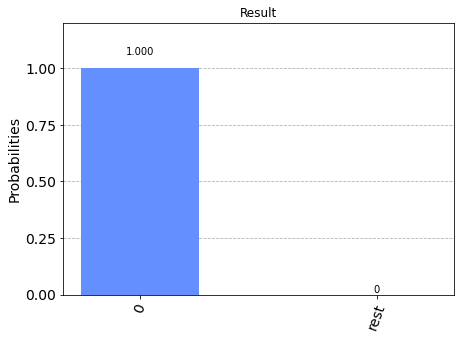

In [14]:
job_monitor(job_api_val)

result_api_val = job_api_val.result()

# The result object is native to the Qiskit package, so we can use Qiskit's tools to print the result as a histogram.
# For API validation, we expect to see all zeroes.
plot_histogram(result_api_val.get_counts(circuit), title="Result", number_to_keep=2)

In [15]:
# Create an object that represents Quantinuum's API emulator target, "quantinuum.hqs-lt-s2-sim".
quantinuum_sim_backend = provider.get_backend("quantinuum.hqs-lt-s2-sim")
cost = quantinuum_sim_backend.estimate_cost(circuit, shots=100)
print(f"Estimated cost: {cost.estimated_total} {cost.currency_code}")

Estimated cost: 5.12 EHQC


In [16]:
# Using the Quantinuum target target, call "run" to submit the job. We'll
# use a count of 100 (simulated runs).
job_sim = quantinuum_sim_backend.run(circuit, count=100)
print("Job id:", job_sim.id())

Job id: 2645e72e-b8c8-11ec-bec7-00155df1b04f


Job Status: job has successfully run


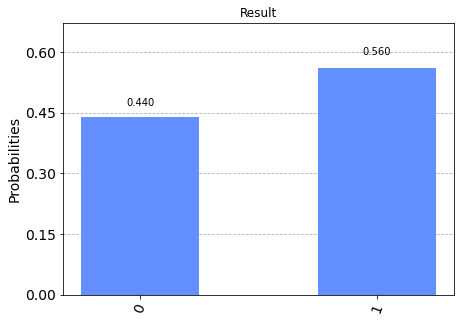

In [17]:
job_monitor(job_sim)

result_sim = job_sim.result()

# The result object is native to the Qiskit package, so we can use Qiskit's tools to print the result as a histogram.
# For running on an emulator, we expect to see random bits generated.
plot_histogram(result_sim.get_counts(circuit), title="Result")